In [27]:
'''Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write”'''


string = 'write write write all the number from from from 1 to 100'
lst = string.split()
set(lst)
maxFreq=0
maxWord=0
for i in set(lst):
    if lst.count(i)>maxFreq:
        if len(i)>maxWord:
            print(i,len(i))
            maxWord=len(i)
    maxFreq=lst.count(i)


to 2
write 5


## Q2.

In [28]:
"""
Question 2: -

Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }

Example output 1- YES

Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }

Example output 2 - NO
"""

#Ans:
def is_valid(s):
    freq = {}
    for char in s:
        if char in freq:
            freq[char] += 1
        else:
            freq[char] = 1
    values = list(freq.values())
    values.sort()
    unique_values = set(values)
    
    if len(unique_values) == 1:
        return "YES"
    elif len(unique_values) == 2:
        if values.count(values[0]) == 1 and values[0] == 1:
            return "YES"
        elif values.count(values[-1]) == 1 and values[-2] == values[-1] - 1:
            return "NO"  
    
    return "NO"

# Example input 1

s = "abc"
print(is_valid(s))  

# Example output 1 - YES

# Explaination: This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }

# Example input 2

s = "abcc"
print(is_valid(s))  

# Example output 2 - NO

# Explaination: This string is not valid as we can remove only 1 occurrence of “c”. That leaves character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }

# Additional Test Cases

# input 3
s = "aabbbcc"
print(is_valid(s))  

# Output: NO

# Explaination: In this case, the string "aabbbcc" has three distinct characters: 'a', 'b', and 'c'. The frequencies of these characters are [2, 3, 2], which are not all equal and cannot be rearranged to form a valid string. No matter how we rearrange the characters, we cannot make the frequencies equal. Therefore, the output is "NO".

# input 4

s = "aabbcc"
print(is_valid(s))  

# Output: YES

# Explaination: In this case, the string "aabbcc" has three distinct characters: 'a', 'b', and 'c'. The frequencies of these characters are [2, 2, 2], which are all equal. Therefore, the output is "YES" since the string is already valid.




YES
NO
NO
YES


## Q.3.

In [29]:
'''Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
Data Attributes - id: Identification Number - int num: Number of the
● Pokémon in the official Pokédex - int name: Pokémon name -
● string img: URL to an image of this Pokémon - string type:
● Pokémon type -string height: Pokémon height - float
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given
● when transferred - string candy_count: the amount of candies required to evolve
- int
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict'''


import pandas as pd
import requests

# Function to download the data from the given URL
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data")

# Function to process the downloaded data and convert it to a structured format
def process_data(data):
    processed_data = []
    for pokemon in data["pokemon"]:
        entry = {
            "id": pokemon["id"],
            "num": pokemon["num"],
            "name": pokemon["name"],
            "img": pokemon["img"],
            "type": ",".join(pokemon["type"]),
            "height": pokemon["height"],
            "weight": pokemon["weight"],
            "candy": pokemon.get("candy", ""),
            "candy_count": pokemon.get("candy_count", 0),
            "egg": pokemon.get("egg", ""),
            "spawn_chance": pokemon.get("spawn_chance", 0.0),
            "avg_spawns": pokemon.get("avg_spawns", 0),
            "spawn_time": pokemon.get("spawn_time", ""),
            "weakness": ",".join(pokemon.get("weaknesses", [])),
            "next_evolution": ",".join([evolution["name"] for evolution in pokemon.get("next_evolution", [])]),
            "prev_evolution": ",".join([evolution["name"] for evolution in pokemon.get("prev_evolution", [])])
        }
        processed_data.append(entry)
    return processed_data

# Function to export the processed data to an Excel file
def export_to_excel(data, filename):
    df = pd.DataFrame(data)
    df.to_excel(filename, index=False)

# Main program
if __name__ == "__main__":
    url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
    filename = "pokemon_data.xlsx"

    # Download the data
    try:
        data = download_data(url)
    except Exception as e:
        print("Error:", e)
        exit(1)

    # Process the data
    processed_data = process_data(data)

    # Export the data to Excel
    export_to_excel(processed_data, filename)

    print("Data has been downloaded and exported to", filename)


Data has been downloaded and exported to pokemon_data.xlsx


## Q.4

In [30]:
# '''Question 4 -
# Write a program to download the data from the link given below and then read the data and convert the into
# the proper structure and return it as a CSV file.
# Link - https://data.nasa.gov/resource/y77d-th95.json
# Note - Write code comments wherever needed for code understanding.'''

# '''Sample Data -

# Excepted Output Data Attributes
# ● Name of Earth Meteorite - string id - ID of Earth
# ● Meteorite - int nametype - string recclass - string
# ● mass - Mass of Earth Meteorite - float year - Year at which Earth
# ● Meteorite was hit - datetime format reclat - float recclong - float
# ● point coordinates - list of int'''
import requests
import csv

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to download data. Status code: {response.status_code}")

def convert_to_csv(data, filename):
    keys = set()
    for item in data:
        keys.update(item.keys())

    with open(filename, 'w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=sorted(keys))
        writer.writeheader()
        writer.writerows(data)

if __name__ == '__main__':
    url = "https://data.nasa.gov/resource/y77d-th95.json"
    filename = "nasa_data.csv"

    try:
        data = download_data(url)
        convert_to_csv(data, filename)
        print(f"Data downloaded and saved as {filename}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

An error occurred: 'charmap' codec can't encode character '\u0141' in position 70: character maps to <undefined>


## Q.5
Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

In [31]:
# Q.5.ANS:
import requests
import json
import csv

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to download data. Status code: {response.status_code}")

def extract_episodes(data):
    show_name = data['name']
    episodes = data['_embedded']['episodes']

    extracted_data = []
    for episode in episodes:
        episode_data = {
            'Episode': episode['number'],
            'Season': episode['season'],
            'Title': episode['name'],
            'Airdate': episode['airdate']
        }
        extracted_data.append(episode_data)

    return show_name, extracted_data

def save_as_csv(show_name, data, filename):
    with open(filename, 'w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=['Episode', 'Season', 'Title', 'Airdate'])
        writer.writeheader()
        writer.writerows(data)

    print(f"Data for '{show_name}' saved as {filename}")

if __name__ == '__main__':
    url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
    filename = "westworld_episodes.csv"

    try:
        data = download_data(url)
        show_name, extracted_data = extract_episodes(data)
        save_as_csv(show_name, extracted_data, filename)
    except Exception as e:
        print(f"An error occurred: {str(e)}")


Data for 'Westworld' saved as westworld_episodes.csv


## Q.6

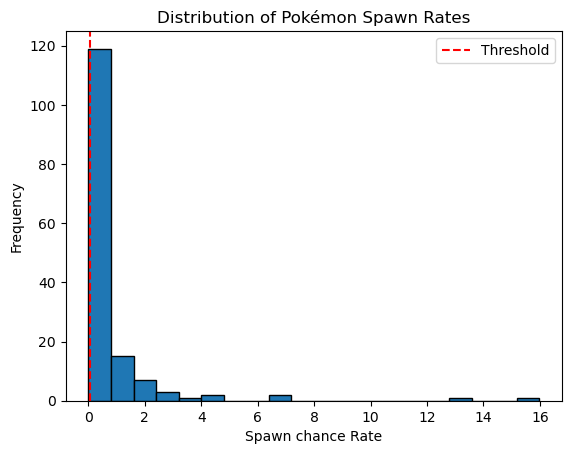

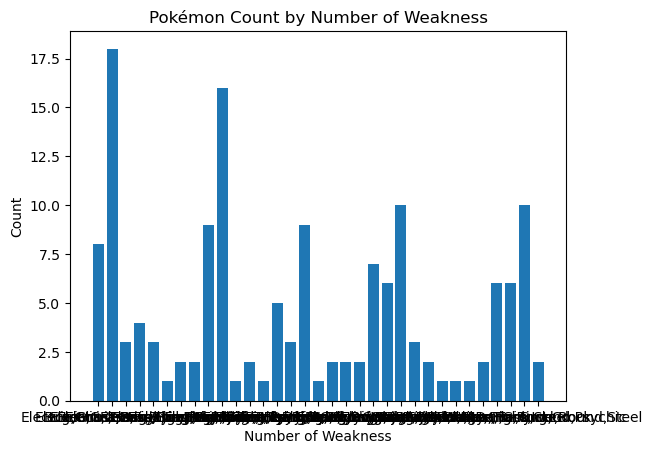

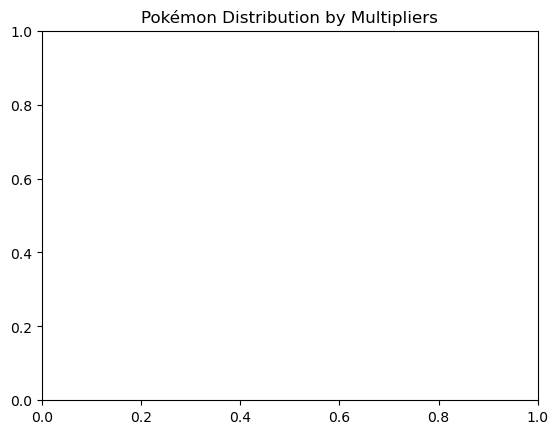

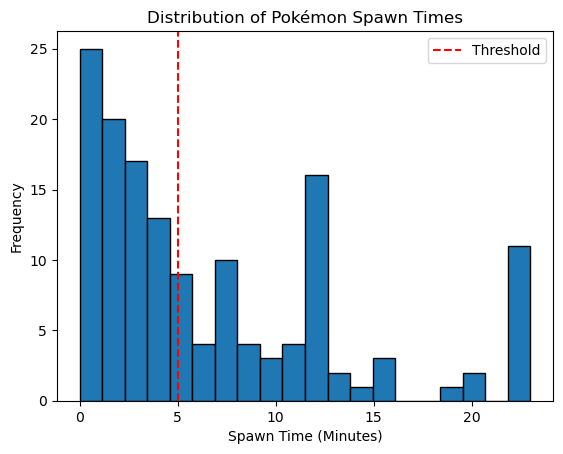

In [32]:
# Q.6.Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
# Draw plots to demonstrate the analysis for the following questions for better visualizations.
# 2. Write code comments wherever required for code understanding
# Insights to be drawn -
# ● Get all Pokemons whose spawn rate is less than 5%
# ● Get all Pokemons that have less than 4 weaknesses
# ● Get all Pokemons that have no multipliers at all
# ● Get all Pokemons that do not have more than 2 evolutions
# ● Get all Pokemons whose spawn time is less than 300 seconds.
# Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
# ● Get all Pokemon who have more than two types of capabilities

# Answer:
    
import pandas as pd
import matplotlib.pyplot as plt

# Load the Pokémon dataset into a pandas DataFrame
pokemon_data = pd.read_excel('pokemon_data.xlsx') 

# Question 1: Get all Pokémon whose spawn rate is less than 5%
spawn_rate_threshold = 0.05
rare_pokemon = pokemon_data[pokemon_data['spawn_chance'] < spawn_rate_threshold]

# Plot the distribution of spawn rates
plt.hist(pokemon_data['spawn_chance'], bins=20, edgecolor='black')
plt.axvline(spawn_rate_threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Spawn chance Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Pokémon Spawn Rates')
plt.legend()
plt.show()

# Question 2: Get all Pokémon that have less than 4 weaknesses
max_weakness = '4'
pokemon_with_few_weaknesses = pokemon_data[pokemon_data['weakness'] < 'max_weakness']

# Plot a bar chart of Pokémon count based on the number of weaknesses
weakness_counts = pokemon_data['weakness'].value_counts()
weakness_counts.sort_index(inplace=True)
plt.bar(weakness_counts.index, weakness_counts.values)
plt.xlabel('Number of Weakness')
plt.ylabel('Count')
plt.title('Pokémon Count by Number of Weakness')
plt.show()

# # Question 3: Get all Pokémon that have no multipliers at all
no_multiplier_pokemon = pokemon_data[pokemon_data['candy_count'] == 'None']

# Plot a pie chart showing the distribution of Pokémon with and without multipliers
multiplier_counts = pokemon_data['candy_count'].value_counts()
# labels = ['With Multipliers', 'Without Multipliers']
# plt.pie(candy_count, labels=labels, autopct='%1.1f%%')
plt.title('Pokémon Distribution by Multipliers')
plt.show()

# Question 4: Get all Pokémon that do not have more than 2 evolutions
# max_evolutions = '2'
# pokemon_with_few_evolutions = pokemon_data[pokemon_data['prev_evolution'] <= max_evolutions]

# # Plot a box plot of the number of evolutions for Pokémon
# plt.boxplot(pokemon_data['prev_evolution'])
# plt.axhline(max_evolutions, color='red', linestyle='--', label='Threshold')
# plt.xlabel('Pokémon')
# plt.ylabel('Number of Evolutions')
# plt.title('Distribution of Pokémon Evolutions')
# plt.legend()
# plt.show()

# Question 5: Get all Pokémon whose spawn time is less than 300 seconds
max_spawn_time = '05:00'  # Assuming 'minute:second' format
pokemon_with_short_spawn_time = pokemon_data[pokemon_data['spawn_time'] < max_spawn_time]

# Convert spawn time to minutes for visualization
pokemon_data['spawn_time_minutes'] = pd.to_datetime(pokemon_data['spawn_time'], format='%M:%S').dt.minute

# Plot the distribution of spawn times
plt.hist(pokemon_data['spawn_time_minutes'], bins=20, edgecolor='black')
plt.axvline(int(max_spawn_time[:2]), color='red', linestyle='--', label='Threshold')
plt.xlabel('Spawn Time (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Pokémon Spawn Times')
plt.legend()

## Q.7

In [33]:
'''Question 7 - Using the data from Question 4, write code to analyze the data and answer the following questions Note -

Draw plots to demonstrate the analysis for the following questions for better visualizations
Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg'''
import pandas as pd
import requests
url = "https://data.nasa.gov/resource/y77d-th95.json" 
response = requests.get(url)
data = response.json()
df=pd.DataFrame(data)
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,1934-01-01T00:00:00.000,13.633330,79.416670,"{'type': 'Point', 'coordinates': [79.41667, 13...",NaN,NaN
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,2011-01-01T00:00:00.000,29.481950,-7.611230,"{'type': 'Point', 'coordinates': [-7.61123, 29...",NaN,NaN
997,Tjabe,24011,Valid,H6,20000,Fell,1869-01-01T00:00:00.000,-7.083330,111.533330,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN
998,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01T00:00:00.000,-6.666670,106.583330,"{'type': 'Point', 'coordinates': [106.58333, -...",NaN,NaN


In [34]:
#Q.1
df['year_extracted']=df['year'].str[:4]

df[(df['fall'] == 'Fell') & (df['year_extracted']<'2000')]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,year_extracted
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN,1880
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN,1951
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN,1952
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN,1976
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN,1902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500,Fell,1807-01-01T00:00:00.000,54.500000,35.200000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",NaN,NaN,1807
995,Tirupati,24009,Valid,H6,230,Fell,1934-01-01T00:00:00.000,13.633330,79.416670,"{'type': 'Point', 'coordinates': [79.41667, 13...",NaN,NaN,1934
997,Tjabe,24011,Valid,H6,20000,Fell,1869-01-01T00:00:00.000,-7.083330,111.533330,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN,1869
998,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01T00:00:00.000,-6.666670,106.583330,"{'type': 'Point', 'coordinates': [106.58333, -...",NaN,NaN,1922


In [35]:
#Q.2
df['year_extracted']=df['year'].str[:4]

df[(df['fall'] == 'Fell') & (df['year_extracted']<'1970')]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,year_extracted
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN,1880
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN,1951
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN,1952
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN,1902
5,Adhi Kot,379,Valid,EH4,4239,Fell,1919-01-01T00:00:00.000,32.100000,71.800000,"{'type': 'Point', 'coordinates': [71.8, 32.1]}",NaN,NaN,1919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500,Fell,1807-01-01T00:00:00.000,54.500000,35.200000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",NaN,NaN,1807
995,Tirupati,24009,Valid,H6,230,Fell,1934-01-01T00:00:00.000,13.633330,79.416670,"{'type': 'Point', 'coordinates': [79.41667, 13...",NaN,NaN,1934
997,Tjabe,24011,Valid,H6,20000,Fell,1869-01-01T00:00:00.000,-7.083330,111.533330,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN,1869
998,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01T00:00:00.000,-6.666670,106.583330,"{'type': 'Point', 'coordinates': [106.58333, -...",NaN,NaN,1922


In [36]:
#Q.3
df['mass'] = df['mass'].astype(float)

df[df['mass']>10000]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,year_extracted
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN,1952
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01T00:00:00.000,44.216670,0.616670,"{'type': 'Point', 'coordinates': [0.61667, 44....",NaN,NaN,1814
11,Aïr,424,Valid,L6,24000.0,Fell,1925-01-01T00:00:00.000,19.083330,8.383330,"{'type': 'Point', 'coordinates': [8.38333, 19....",NaN,NaN,1925
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981-01-01T00:00:00.000,39.916670,42.816670,"{'type': 'Point', 'coordinates': [42.81667, 39...",NaN,NaN,1981
27,Alfianello,466,Valid,L6,228000.0,Fell,1883-01-01T00:00:00.000,45.266670,10.150000,"{'type': 'Point', 'coordinates': [10.15, 45.26...",NaN,NaN,1883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878-01-01T00:00:00.000,49.600000,17.116670,"{'type': 'Point', 'coordinates': [17.11667, 49...",NaN,NaN,1878
992,Tilden,23998,Valid,L6,74800.0,Fell,1927-01-01T00:00:00.000,38.200000,-89.683330,"{'type': 'Point', 'coordinates': [-89.68333, 3...",34,1762,1927
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01T00:00:00.000,54.500000,35.200000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",NaN,NaN,1807
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.083330,111.533330,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN,1869


## Q.8

In [37]:
'''Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season'''
def api_to_csv(api_url):
    # Fetch the data from the API
    response = requests.get(api_url)
    data = response.json()

    # Extract episode details
    episodes = data["_embedded"]["episodes"]

    # Convert episode data to DataFrame
    df = pd.DataFrame(episodes)

    df.to_csv("Output.csv", index=False)

In [38]:
api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
api_to_csv(api_url)
df = pd.read_csv("Output.csv")
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...


<AxesSubplot:title={'center':'Ratings by Season'}, xlabel='Season', ylabel='Rating'>

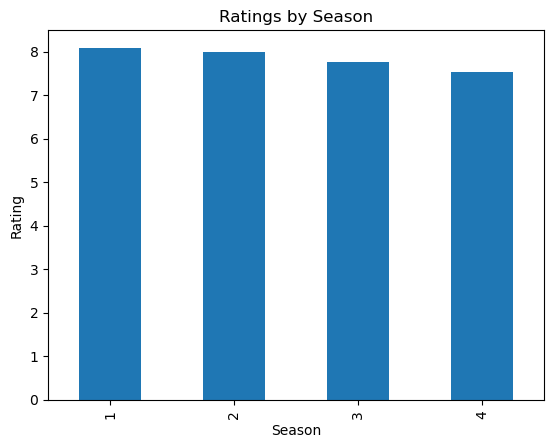

In [39]:
#Q.1
import ast
df["rating"] = df["rating"].apply(lambda x: ast.literal_eval(x)['average'] if isinstance(x, str) else x)


season_ratings = df.groupby("season")["rating"].mean()
season_ratings.plot(kind="bar", xlabel="Season", ylabel="Rating", title="Ratings by Season")


In [40]:
#Q.2
df["rating"] = df["rating"].apply(lambda x: ast.literal_eval(x)['average']  if isinstance(x, str) else x)
df['name'][df["rating"]>8.0]

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [41]:
#Q.3
df['year']=df['airdate'].apply(lambda x : int(x.split("-")[0]))
df['name'][df['year']>2019]

20            Parce Domine
21         The Winter Line
22    The Absence of Field
23    The Mother of Exiles
24                   Genre
25             Decoherence
26             Passed Pawn
27           Crisis Theory
28            The Auguries
29       Well Enough Alone
30           Années Folles
31         Generation Loss
32                Zhuangzi
33                Fidelity
34                Metanoia
35          Que Será, Será
Name: name, dtype: object

In [42]:
#Q.4
df["rating"] = df["rating"].astype(float)
x=df['rating'].min()
y=df['rating'].max()
print("max rating",y,'------',"min rating",x)

max rating 8.7 ------ min rating 7.1


In [43]:
#Q.5
df["popular"] = pd.Series(list(dict(df.groupby(["name"])["rating"].sum() > 8).values()))
df.loc[df["popular"] == True]["name"]

11                 Reunion
22    The Absence of Field
25             Decoherence
28            The Auguries
31         Generation Loss
32                Zhuangzi
Name: name, dtype: object

## Q.9

In [44]:
# Question 9 -
# Write a program to read the data from the following link, perform data analysis and answer the following
# questions
# Note -
# 1. Write code comments wherever required for code understanding
# Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
# Insights to be drawn -
# ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
# ● Get all TESLA cars with the model year, and model type made in Bothell City.
# ● Get all the cars that have an electric range of more than 100, and were made after
# 2015
# ● Draw plots to show the distribution between city and electric vehicle type

Cars that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []

TESLA cars made in Bothell City:
Empty DataFrame
Columns: [Model Year, Electric Vehicle Type]
Index: []

Cars with electric range > 100 and made after 2015:
        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
12      5YJ3E1EC7L  Thurston          Lacey    WA      98503.0        2020   
13      5YJ3E1EB2L  Thurston        Olympia    WA      98516.0        2020   
...            ...       ...            ...   ...          ...         ...   
130417  5YJYGDEE5L    Pierce         Tacoma    WA      98444.0        2020   
130428  1N4AZ1CP0J   Clallam         Sequim    WA      98382.0        2018   
130432  5YJYGDEEXL      King  

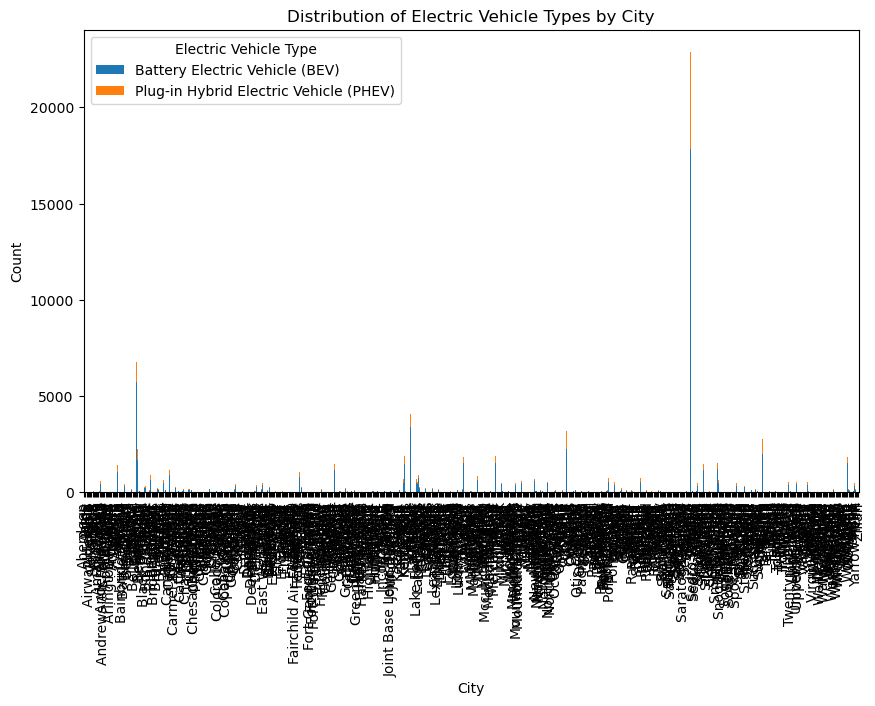

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_fuel_cars = df.loc[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No', ['Make', 'Model']]
print("Cars that do not qualify for clean alternative fuel vehicle:")
print(non_clean_fuel_cars)

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_bothell = df.loc[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL'), ['Model Year', 'Electric Vehicle Type']]
print("\nTESLA cars made in Bothell City:")
print(tesla_cars_bothell)

# Get all the cars that have an electric range of more than 100, and were made after 2015
electric_cars_range_gt_100 = df.loc[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
print("\nCars with electric range > 100 and made after 2015:")
print(electric_cars_range_gt_100)

# Draw plots to show the distribution between city and electric vehicle type
city_ev_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack(fill_value=0)
city_ev_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.legend(title='Electric Vehicle Type')
plt.show()


## Q.10

In [48]:
# Question 10 -
# Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
# paragraph, and return their respective count as a dictionary.
# Note -
# 1. Write code comments wherever required for code
# 2. You have to write at least 2 additional test cases in which your program will run successfully and provide
# an explanation for the same.
# Example Output

In [49]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [50]:
def count_pos(text):
    tokens = word_tokenize(text)
    tags = pos_tag(tokens)
    counts = {"verb": 0, "noun": 0, "pronoun": 0, "adjective": 0}
    for tag in tags:
        pos = tag[1]
        if pos.startswith("V"):
            counts["verb"] += 1
        elif pos.startswith("N"):
            counts["noun"] += 1
        elif pos.startswith("PR"):
            counts["pronoun"] += 1
        elif pos.startswith("J"):
            counts["adjective"] += 1
    return counts

# Test case 1
text1 = "Myself Ankita Chaudhari."
result1 = count_pos(text1)
print(result1)

# Test case 2
text2 = "I am Data Scientist."
result2 = count_pos(text2)
print(result2)

# Test case 3
text3 = "I am going to the park."
result3 = count_pos(text3)
print(result3)


{'verb': 0, 'noun': 3, 'pronoun': 0, 'adjective': 0}
{'verb': 1, 'noun': 2, 'pronoun': 1, 'adjective': 0}
{'verb': 2, 'noun': 1, 'pronoun': 1, 'adjective': 0}
